# **Data Preparation**

> In this project, I will be exploring [retail online dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) in order to get insights



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading the dataset
retail_df = pd.read_csv('/content/drive/MyDrive/dataset/retail_store/online_retail.csv', 
                        dtype={'Invoice':str,
                               'Customer ID':str})

In [4]:
# checking retail_df
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085,United Kingdom


In [5]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  object 
 7   Country      525461 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 32.1+ MB


The retail_df dataset has **541909** rows and **8** columns. When going through the columns, we notice that we have some missing values in the **Customer ID** column, as it only has **406829** values. Also, the column Description has missing values. So, we carry on to clean the dataset as the next step.

# **Data Cleaning**

In [6]:
retail_df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
check_description = retail_df[retail_df['Description'].isna()]
check_description.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,12/1/2009 11:44,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,12/1/2009 17:26,0.0,NaN,United Kingdom
3161,489659,21350,NaN,230,12/1/2009 17:39,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,12/2/2009 11:45,0.0,NaN,United Kingdom
4296,489806,18010,NaN,-770,12/2/2009 12:42,0.0,NaN,United Kingdom


In [8]:
check_customerID = retail_df[retail_df['Customer ID'].isna()]
check_customerID

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,12/1/2009 10:52,0.00,NaN,United Kingdom
283,489463,71477,short,-240,12/1/2009 10:52,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,12/1/2009 10:53,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,12/1/2009 11:44,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,12/1/2009 11:49,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,12/9/2010 17:17,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,12/9/2010 17:17,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,12/9/2010 17:18,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,12/9/2010 17:25,0.00,NaN,United Kingdom


Our data contains the following columns:

1. **InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter '**C**', it indicates a cancellation.
2. **StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
3. **Description**: Product (item) name. Nominal.
4. **Quantity**: The quantities of each product (item) per transaction. Numeric.
5. **InvoiceDate**: Invoice date and time. Numeric. The day and time when a transaction was generated.
6. **UnitPrice**: Unit price. Numeric. Product price per unit in sterling (Â£).
7. **CustomerID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
8. **Country**: Country name. Nominal. The name of the country where a customer resides.

Since we are using the same dataset from the previous lesson, we can utilize the same data loading and cleaning procedure we implemented. Recall that we had the following considerations for our data cleaning:

1. Remove transaction if its `InvoiceNo` starts with the letter `'C'` (indicates a cancellation)
2. Remove transaction if the `CustomerID` is null/blank. The transaction will not be useful for our analysis since there is no corresponding customer.
3. Check for outliers (e.g. `Quantity` and `UnitPrice` should not be negative)

In [9]:
retail_df.describe()

,Quantity,Price
count,525461.000000,525461.000000
mean,10.337667,4.688834
std,107.424110,146.126914
min,-9600.000000,-53594.360000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,25111.090000


## Removed Cancelled invoices

> As mentioned in the description of the dataset, some InvoiceNo start with the letter "c" = cancelled. Let's see if our hypothesis is correct about the negative quantity: -9600.
We will look for the list of cancelled invoices and check if there is an invoice with that quantity.



In [10]:
#get cancelled invoices
cancelled_invoices = retail_df[retail_df['Invoice'].astype(str).str.contains('C')]
cancelled_invoices.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,12/1/2009 10:33,2.95,16321,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,12/1/2009 10:33,1.65,16321,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,12/1/2009 10:33,4.25,16321,Australia
181,C489449,21896,POTTING SHED TWINE,-6,12/1/2009 10:33,2.10,16321,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,12/1/2009 10:33,2.95,16321,Australia


In [11]:
len(cancelled_invoices)

10206

In [12]:
cancelled_invoices.sort_values('Quantity', ascending=True)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838,United Kingdom
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,9/28/2010 11:02,0.08,14277,France
359670,C524235,21096,SET/6 FRUIT SALAD PAPER PLATES,-7008,9/28/2010 11:02,0.13,14277,France
359630,C524235,16047,POP ART PEN CASE & PENS,-5184,9/28/2010 11:02,0.08,14277,France
359636,C524235,37340,MULTICOLOUR SPRING FLOWER MUG,-4992,9/28/2010 11:02,0.10,14277,France
...,...,...,...,...,...,...,...,...
180632,C506492,22361,GLASS JAR DAISY FRESH COTTON WOOL,-1,4/30/2010 10:52,2.95,15268,United Kingdom
180633,C506492,22364,GLASS JAR DIGESTIVE BISCUITS,-1,4/30/2010 10:52,2.95,15268,United Kingdom
180640,C506493,21217,RED SPOTTY ROUND CAKE TINS,-1,4/30/2010 10:52,9.95,17005,United Kingdom
324891,C521039,21843,RED RETROSPOT CAKE STAND,-1,9/2/2010 9:17,10.95,15142,United Kingdom


In [13]:
c_invoices =  retail_df[retail_df['Invoice'].str.startswith("C")].index.to_list()

In [14]:
retail_df = retail_df.drop(index=c_invoices)
retail_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530,United Kingdom


In [15]:
retail_df.describe()

,Quantity,Price
count,515255.000000,515255.000000
mean,10.956631,3.956373
std,104.354013,127.688563
min,-9600.000000,-53594.360000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,25111.090000


In [16]:
retail_df.sort_values('Quantity', ascending=True)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
303996,519017,22759,NaN,-9600,8/13/2010 9:14,0.0,NaN,United Kingdom
156488,504311,22197,NaN,-9200,4/12/2010 14:39,0.0,NaN,United Kingdom
428975,530348,16235,?,-9000,11/2/2010 15:48,0.0,NaN,United Kingdom
194372,507913,10120,Zebra invcing error,-9000,5/11/2010 17:16,0.0,NaN,United Kingdom
437008,531177,20852,Given away,-8800,11/5/2010 14:40,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,3/17/2010 13:09,0.1,13902,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,3/17/2010 13:09,0.1,13902,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,3/17/2010 13:09,0.1,13902,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,3/17/2010 13:09,0.1,13902,Denmark


The dataset above clearly shows that the customer ID is null, which means the price is 0. As a result, we must remove some missing values for customer ID

In [17]:
retail_df['Customer ID'].isna().sum()

107560

In [18]:
retail_df = retail_df.dropna(subset=['Customer ID'])
retail_df.count()

Invoice        407695
StockCode      407695
Description    407695
Quantity       407695
InvoiceDate    407695
Price          407695
Customer ID    407695
Country        407695
dtype: int64

We see that there are 107,560 transactions without a customer ID. This leaves us with 407,695 transactions.  
  
Next, we check our `Quantity` and `Price` for outliers.

In [19]:
retail_df[['Quantity','Price']].describe()

,Quantity,Price
count,407695.000000,407695.000000
mean,13.586686,3.294188
std,96.842229,34.756655
min,1.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,19152.000000,10953.500000


Using the describe function, we see some descriptive statistics for our variables. Notice that there are also large max quantities and price compared to their 75th percentiles. We can also choose to remove them, but since we have mostly wholesale customers, there is a good chance that these quantities are correct.

In [20]:
retail_df[retail_df['Quantity']==retail_df['Quantity'].max()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2/15/2010 11:57,0.1,13902,Denmark


In [21]:
retail_df[retail_df['Price']==retail_df['Price'].max()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
135013,502263,M,Manual,1,3/23/2010 15:22,10953.5,12918,United Kingdom


The transaction with a very large quantity is a mug with a price of 0.1. This seems plausible, and we can choose to retain it. Similarly, the transaction with the extremely high price was generated manually (based on the description) and has only one quantity. We can also retain this.

The dataset has been already cleaned. Now, Let's move the next steps

# **Exploratory Data Analysis**

In this step, we can analyze the dataset and observe patterns as following : 
1. The counts of unique invoice and customers
1. The total transactions per customer
1. Monthly trend of transactions
1. The peak transaction hour
1. Distribution of Transactions per Customer (Frequency)
1. Distribution of Revenue per Customer (Monetary)
1. Total Monthly Revenue

Since we are now interested in the monetary aspect of the data, we add the related metrics in our analysis.

**1. The counts of unique invoice and customer**

In [22]:
print('There are ', retail_df['Invoice'].nunique(), 'invoices and', retail_df['Customer ID'].nunique(), 'Customers')

There are  19215 invoices and 4314 Customers


It means each customer has multiple stock codes(items)

**2. The total transactions per customers**

In [23]:
# group by Customer ID 
# it may be possible to have multiple stock codes in a single invoice
# so we only count the unique Invoice.
df_customer = retail_df.groupby('Customer ID')['Invoice'].nunique().reset_index()
df_customer

,Customer ID,Invoice
0,12346,11
1,12347,2
2,12348,1
3,12349,3
4,12351,1
...,...,...
4309,18283,6
4310,18284,1
4311,18285,1
4312,18286,2


**Who are the top 10 transactions ?**

In [24]:
top_10 = df_customer.sort_values(by='Invoice', ascending=False).head(10)
top_10

,Customer ID,Invoice
1842,14911,205
3998,17850,155
251,12748,144
2135,15311,121
506,13089,109
1270,14156,102
1607,14606,102
939,13694,94
3991,17841,91
4185,18102,89


In [25]:
top_10 = top_10.rename(columns={'Customer ID': 'CustomerID'})

Text(0, 0.5, 'Customer ID')

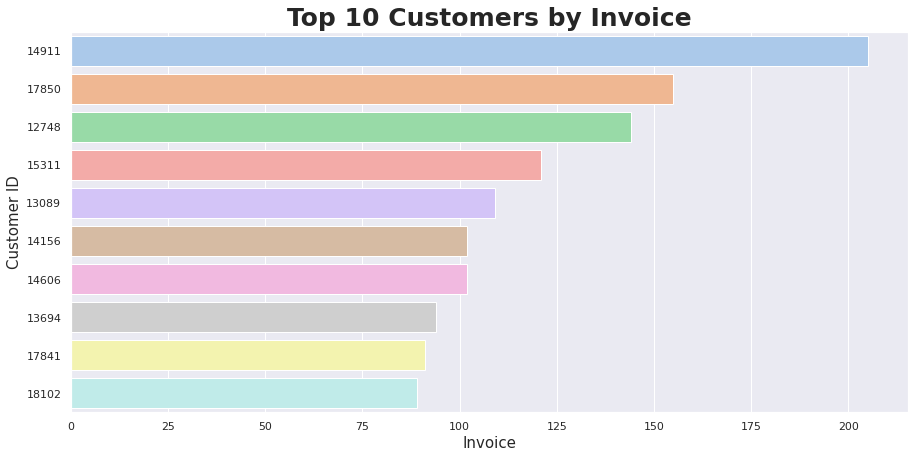

In [26]:
sns.set_theme(style='darkgrid', palette='pastel')
plt.figure(figsize = (15, 7))
sns.barplot(data=top_10, x='Invoice', y='CustomerID', orient='h', order=top_10.sort_values('Invoice', ascending = False).CustomerID)
plt.title("Top 10 Customers by Invoice", fontsize=25, fontweight='bold')
plt.xlabel("Invoice", fontsize = 15)
plt.ylabel("Customer ID", fontsize = 15)

**3. Monthly trend of transactions**

In [27]:
retail_df['InvoiceDate']

0          12/1/2009 7:45
1          12/1/2009 7:45
2          12/1/2009 7:45
3          12/1/2009 7:45
4          12/1/2009 7:45
               ...       
525456    12/9/2010 20:01
525457    12/9/2010 20:01
525458    12/9/2010 20:01
525459    12/9/2010 20:01
525460    12/9/2010 20:01
Name: InvoiceDate, Length: 407695, dtype: object

In [28]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%m/%d/%Y %H:%M')

<ipython-input-28-0bc1fa932670>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%m/%d/%Y %H:%M')


In [29]:
retail_df['invoice_month'] = retail_df['InvoiceDate'].dt.strftime('%Y-%m')

<ipython-input-29-4c2a401a58ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['invoice_month'] = retail_df['InvoiceDate'].dt.strftime('%Y-%m')


In [30]:
monthly_invoice = retail_df.groupby('invoice_month', as_index=False)['Invoice'].count()
monthly_invoice

,invoice_month,Invoice
0,2009-12,30761
1,2010-01,21778
2,2010-02,23369
3,2010-03,32302
4,2010-04,27238
5,2010-05,28644
6,2010-06,31191
7,2010-07,27033
8,2010-08,26393
9,2010-09,34602


Text(0.5, -0.3, 'Month Date')

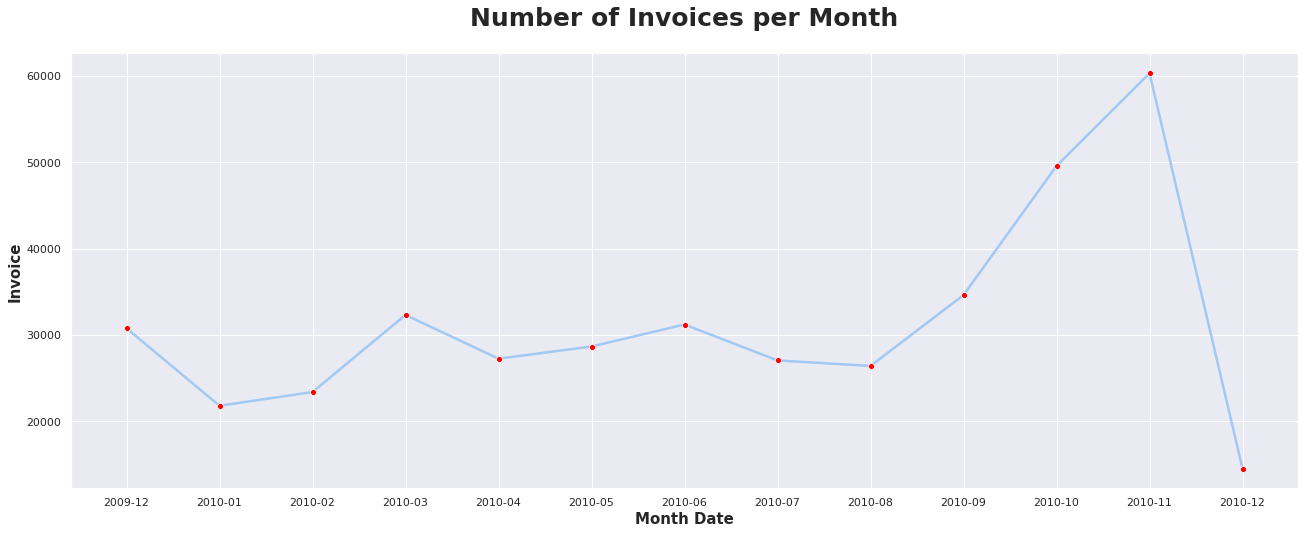

In [31]:
f, ax = plt.subplots(figsize=(22, 8))
sns.lineplot(x='invoice_month', y='Invoice', data=monthly_invoice, linewidth=2.5,  marker='o', markerfacecolor='red')

ax.set_title("Number of Invoices per Month", fontsize=25, fontweight='bold', position=(0.5,1.05))
ax.set_ylabel("Invoice",fontsize=15, fontweight='bold', position=(-0.1,0.5))
ax.set_xlabel("Month Date",fontsize=15, fontweight='bold', position=(0.5,-0.3))

We see a couple of interesting findings here.
1. Since 2009-12, the number of orders are quite stable.
2. From 2010-08 to 2010-11 the number of orders gradually increased and reached the highest orders
3. The number of orders dramatically went up in 2010-12 to the lowest point
> **Recommendation**
  1. From Sept 2010-Nov 2020, it shows positive trends and we recommend to follow that strategic sales in that timeline especially in November. 
  2. prepare for the promotion in special days, at the beginning of the month and at the end of the month to increase the sales.
  3. Make sure the website or application is optimized for mobile devices and desktop devices and can handle a high volume of traffic.


**The peak transaction hour**

In [32]:
invoice_hour = retail_df.groupby(retail_df['InvoiceDate'].dt.hour)['Invoice'].nunique().reset_index()
invoice_hour

,InvoiceDate,Invoice
0,7,49
1,8,444
2,9,1209
3,10,2232
4,11,2410
5,12,3173
6,13,2891
7,14,2366
8,15,2063
9,16,1264


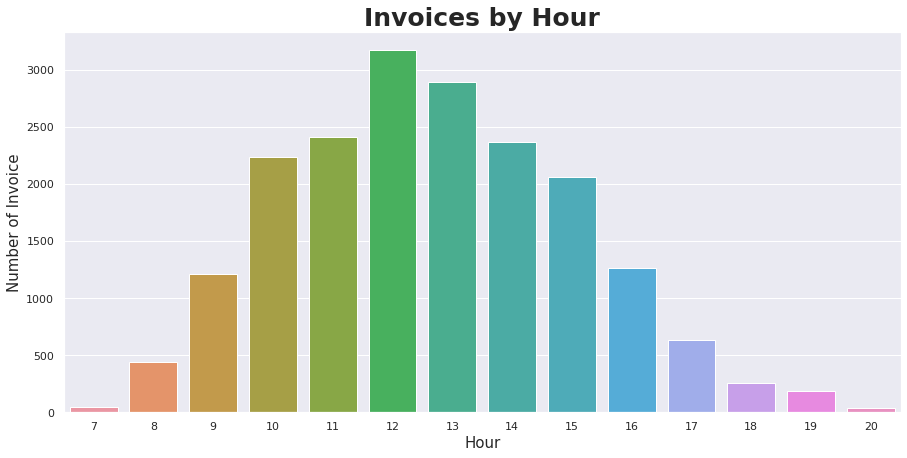

In [33]:
plt.figure(figsize = (15, 7))
sns.barplot(x = 'InvoiceDate', y = 'Invoice', data = invoice_hour)
plt.xlabel("Hour", fontsize = 15)
plt.ylabel("Number of Invoice", fontsize = 15)
plt.title("Invoices by Hour", fontsize=25, fontweight='bold')
plt.show()

It shows that the peak hours for customers to purchase between 10AM and 3PM


> **Reccomendation**
1. Focus on displaying the best perfomance ads during peak hours on social media platform 
2. Focus on promoting time-sensitive deals or discounts during that time. For example, offering a "lunch special" promotion.
3. Follow up to send out push notifications or emails to customers during peak hours reminding them of current deals or promotions.

Revenue per Customer

> To get the total revenue per customer, we need to add a total sales column (quantity x unit price). We can then change our aggregate function to its' sum instead of the count of unique transactions.



In [34]:
# create a total_amount column
retail_df['total_sales'] = retail_df['Quantity'] * retail_df['Price']

<ipython-input-34-8c597e9093c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['total_sales'] = retail_df['Quantity'] * retail_df['Price']


In [35]:
# group by Customer ID 
# get the sum of total_sales
df_customer1 = retail_df.groupby('Customer ID')['total_sales'].sum().reset_index()

**Who are the top 10 spenders ?**

In [36]:
top_10Spenders = df_customer1.sort_values('total_sales', ascending=False).head(10)
top_10Spenders

,Customer ID,total_sales
4185,18102,349164.35
1638,14646,248396.50
1270,14156,196566.74
1842,14911,152147.57
939,13694,131443.19
3746,17511,84541.17
1953,15061,83284.38
3130,16684,80489.21
3179,16754,65500.07
4067,17949,60117.60


In [37]:
top_10Spenders = top_10Spenders.rename(columns={'Customer ID': 'CustomerID'})
top_10Spenders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 4185 to 4067
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   10 non-null     object 
 1   total_sales  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


Text(0, 0.5, 'Customer ID')

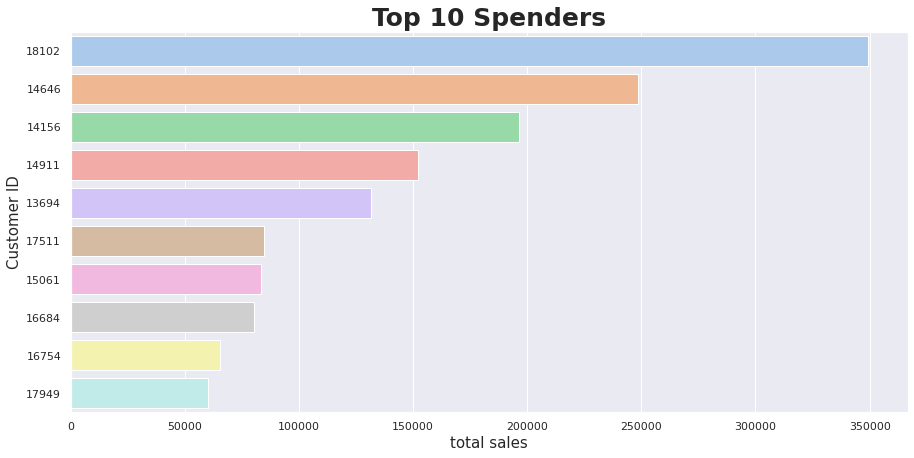

In [38]:
plt.figure(figsize = (15, 7))
sns.barplot(data=top_10Spenders, x='total_sales', y='CustomerID', orient='h', order=top_10Spenders.sort_values('total_sales', ascending = False).CustomerID)
plt.title("Top 10 Spenders", fontsize=25, fontweight='bold')
plt.xlabel("total sales", fontsize = 15)
plt.ylabel("Customer ID", fontsize = 15)

> **Reccomendation**
1. For top 10 spenders, giving them special offers or rewards for new products relates to the historical purchase. 

Text(0, 0.5, 'Count of Customers')

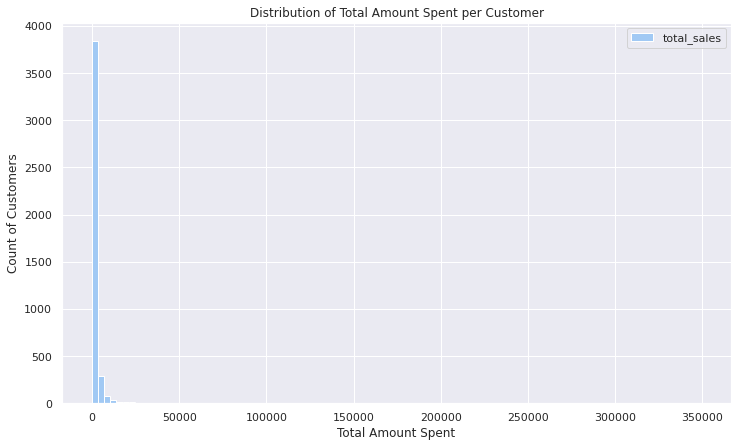

In [39]:
fig, ax = plt.subplots(figsize=(12, 7))
df_customer1.plot(kind='hist', ax=ax, bins=100)
ax.set_title('Distribution of Total Amount Spent per Customer')
ax.set_xlabel('Total Amount Spent')
ax.set_ylabel('Count of Customers')

Similarly, the distribution of total amount spent is also skewed towards the lower range. The leftmost bars indicate that we have a large number of customers (>3,500) with small spending (<50,000). We also see some smaller bars in the right tail which tells us that we have a small number of customers with large spending (>50,000).

# **RFM Analysis**

We can now proceed with the RFM Analysis.  

In this case, we need to set a "current date" for our recency calculations. Let's assume that our current date is 1 day after the latest in our dataset. In actual application, we can use the actual current date as long as the dataset is also updated.

Let's define the current date. To work with dates in python, we need to import the [datetime](https://docs.python.org/3/library/datetime.html) module. It has a timedelta function which is used to add or subtract different time intervals (days, weeks, months, etc.)

In [40]:
import datetime

latest_invoice_date = retail_df['InvoiceDate'].max()
current_date = latest_invoice_date + datetime.timedelta(days=1)
print('The latest invoice date is on', latest_invoice_date,'and the current date is on', current_date)

The latest invoice date is on 2010-12-09 20:01:00 and the current date is on 2010-12-10 20:01:00


## Recency
We define our **recency** to be the number of days since a customer's latest transaction. To get this value, we get the latest invoice date (max) of each customer and get the number of days to the current date.

In [41]:
# get max invoice date per customer
df_latest_invoice = retail_df.groupby('Customer ID')['InvoiceDate'].max()

In [42]:
# get number of days between latest invoice date and current date
# .dt.days means that we only get the actual days (not decimal)
df_recency = (current_date - df_latest_invoice).dt.days
df_recency.head()

Customer ID
12346    165
12347      3
12348     74
12349     43
12351     11
Name: InvoiceDate, dtype: int64

In the resulting table, we see that customer 12346 had their latest transaction on June 28, 2010. Since our current date is December 10, 2010, it has been 165 days already since their last purchase.

Customer 12347, on the other hand, had a transaction just 3 days ago!

### Frequency

We now calculate our **frequency**. This is defined by the number of transactions per customer over the whole period of our dataset. To calculate this, we use the groupby functions we used in our exploratory analysis.

In [43]:
df_frequency = retail_df.groupby('Customer ID')['Invoice'].nunique()
df_frequency.head()

Customer ID
12346    11
12347     2
12348     1
12349     3
12351     1
Name: Invoice, dtype: int64

This table tells us how many transactions our customers had from December 2009 - December 2010.

### Monetary
Lastly, we calculate our **monetary** values with the same groupby function. We define this metric by the total amount spent by each customer.

In [44]:
df_monetary = retail_df.groupby('Customer ID')['total_sales'].sum()
df_monetary

Customer ID
12346     372.86
12347    1323.32
12348     222.16
12349    2671.14
12351     300.93
          ...   
18283     641.77
18284     461.68
18285     427.00
18286    1296.43
18287    2345.71
Name: total_sales, Length: 4314, dtype: float64

### RFM Scores
We now merge these tables into a single dataframe. We put each series together in a dictionary and use **pd.DataFrame**

In [45]:
df_rfm = pd.DataFrame({'recency': df_recency, 'frequency':df_frequency, 'monetary':df_monetary})
df_rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346,165,11,372.86
12347,3,2,1323.32
12348,74,1,222.16
12349,43,3,2671.14
12351,11,1,300.93


We now have RFM values for each customer. A common way to generate the RFM scores is to group each customer by the quantile or qcut function.

Using the qcut function, we want to divide into 5 groups of equal size

1. For **recency**, **frequency** and **monetary** score (the higher is the better):
- Score = 1; 
- Score = 2; 
- Score = 3; 
- Score = 4;
- Score = 5; 

<br>  

Let's use this guide for our analysis:

We calculate the RFM scores based on their labels

#### Recency Score

In [46]:
df_rfm['recency_score'] = pd.qcut(df_rfm['recency'], 5, labels = [5, 4 , 3, 2, 1])
df_rfm

,recency,frequency,monetary,recency_score
Customer ID,,,,
12346,165,11,372.86,2
12347,3,2,1323.32,5
12348,74,1,222.16,2
12349,43,3,2671.14,3
12351,11,1,300.93,5
...,...,...,...,...
18283,18,6,641.77,4
18284,67,1,461.68,3
18285,296,1,427.00,1


### Frequency Score

In [47]:
df_rfm['frequency_score']= pd.qcut(df_rfm['frequency'].rank(method='first'),5, labels=[1,2,3,4,5])
df_rfm

,recency,frequency,monetary,recency_score,frequency_score
Customer ID,,,,,
12346,165,11,372.86,2,5
12347,3,2,1323.32,5,2
12348,74,1,222.16,2,1
12349,43,3,2671.14,3,3
12351,11,1,300.93,5,1
...,...,...,...,...,...
18283,18,6,641.77,4,5
18284,67,1,461.68,3,2
18285,296,1,427.00,1,2


### Monetary Score

In [48]:
df_rfm['monetary_score'] = pd.qcut(df_rfm['monetary'], 5, labels = [1, 2, 3, 4, 5])
df_rfm

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
Customer ID,,,,,,
12346,165,11,372.86,2,5,2
12347,3,2,1323.32,5,2,4
12348,74,1,222.16,2,1,1
12349,43,3,2671.14,3,3,5
12351,11,1,300.93,5,1,2
...,...,...,...,...,...,...
18283,18,6,641.77,4,5,3
18284,67,1,461.68,3,2,2
18285,296,1,427.00,1,2,2


#### Concatenate the RFM Scores

In [49]:
df_rfm['rfm_score'] = (df_rfm['recency_score'].astype(str) + 
                     df_rfm['frequency_score'].astype(str) + 
                     df_rfm['monetary_score'].astype(str))
df_rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
Customer ID,,,,,,,
12346,165,11,372.86,2,5,2,252
12347,3,2,1323.32,5,2,4,524
12348,74,1,222.16,2,1,1,211
12349,43,3,2671.14,3,3,5,335
12351,11,1,300.93,5,1,2,512


The resulting table shows corresponding RFM scores for each customer. We can now analyze each segment and create personalized recommendations for each customer.

## RFM Results

Recall our RFM score segmentation:

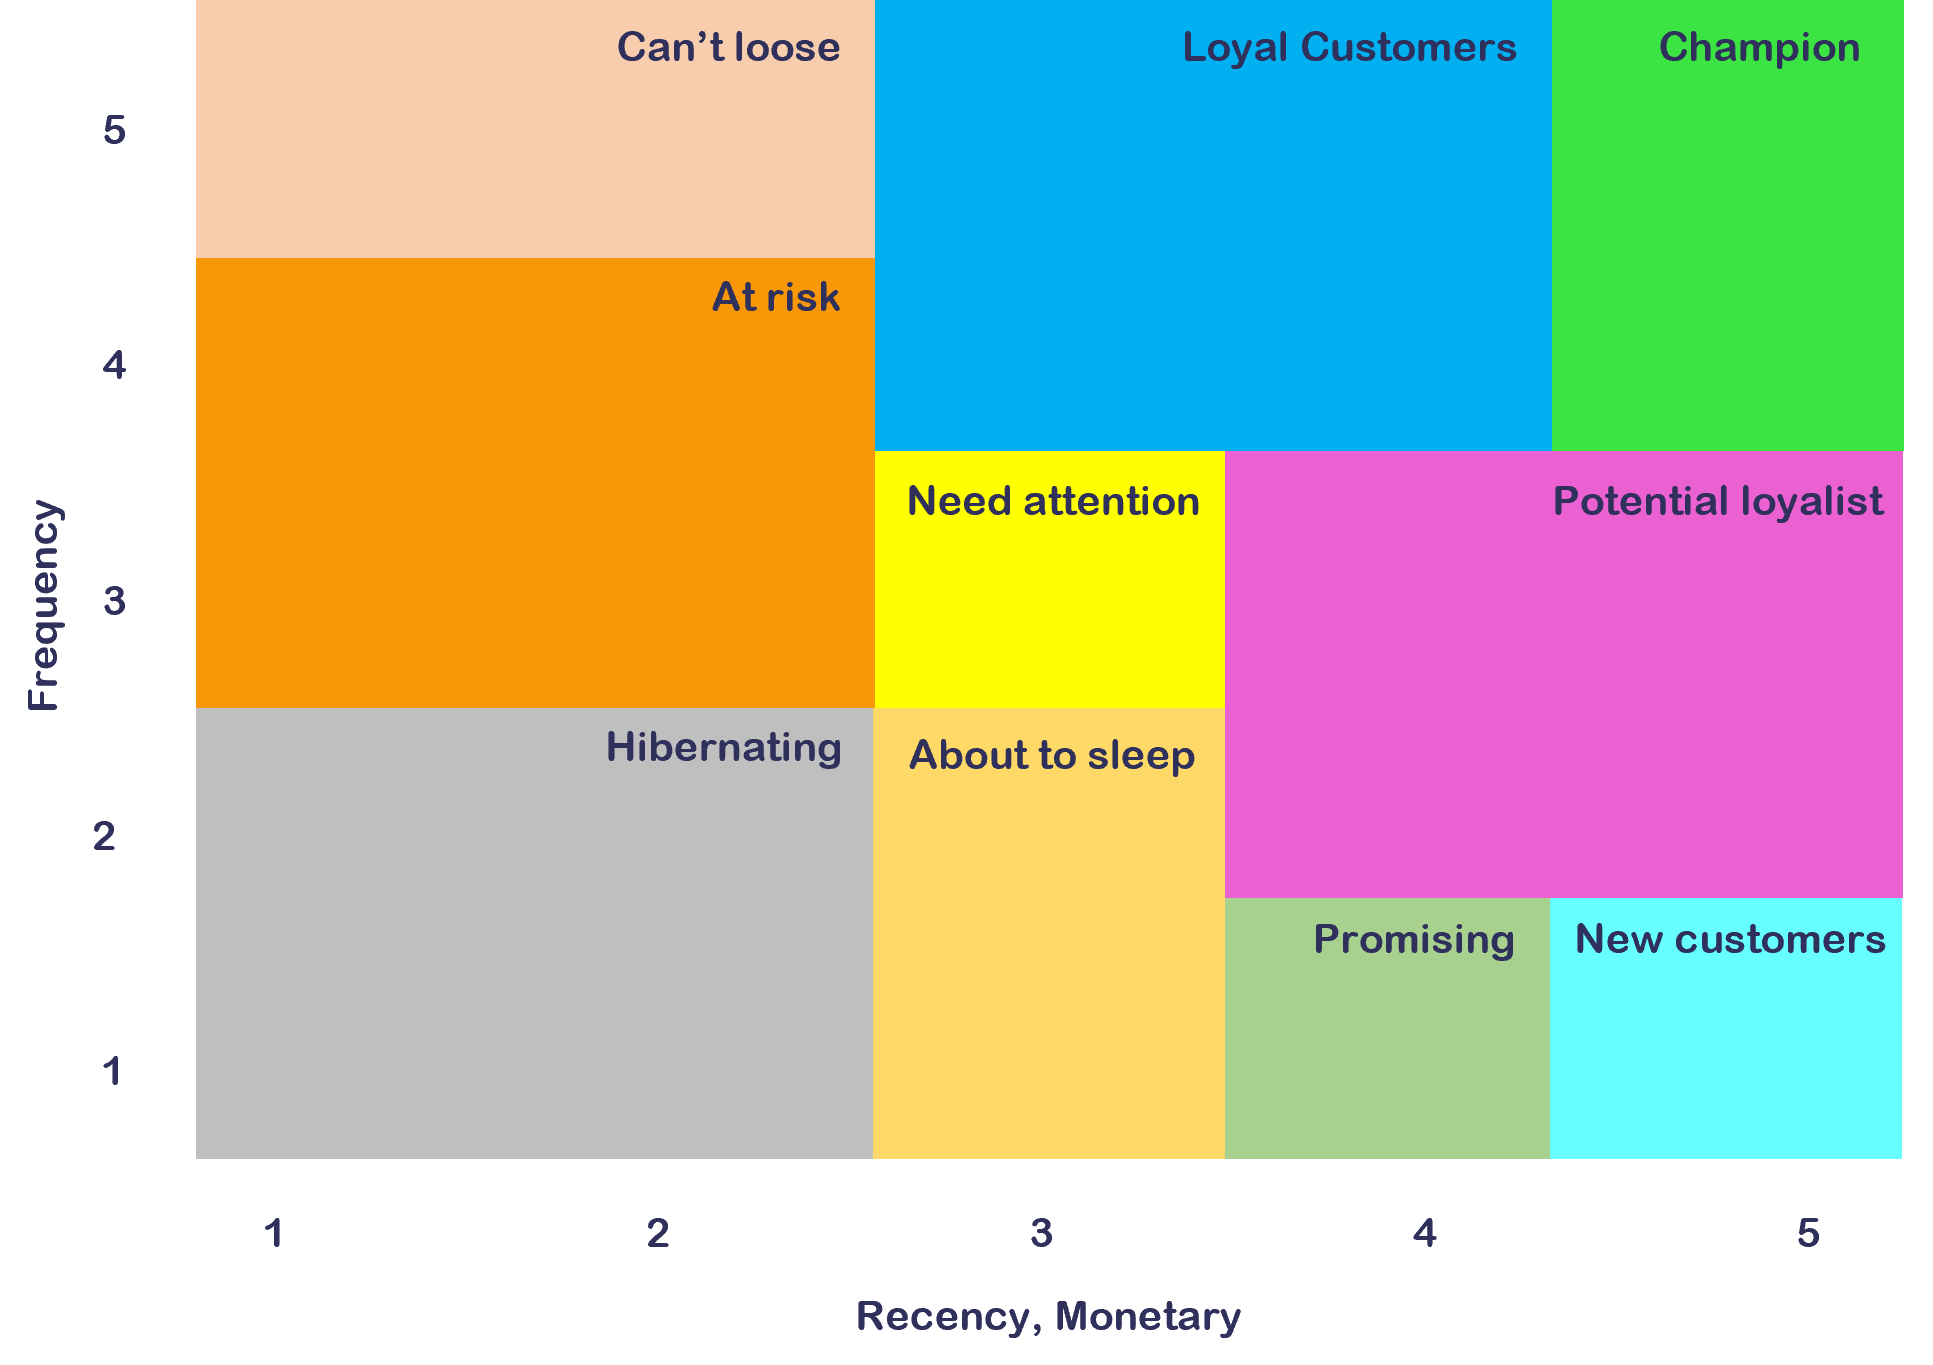

**The list of segments and the respective description is provided below :** 
1. Champions - Users who visited most recently, visited most often, and spend the highest
2. Loyal Customers - Users who visited recently, visited often, and spent a great amount
3. Potential Loyalist - A recent user, who spent a good amount
4. New Users - User visited most recently, but not often, has not spent much
5. Promising - Average recency, frequency, and monetary scores
6. Needs Attention - User has spent a good amount but long ago (not visited recently)
7. About To Sleep - Below average recency, frequency, and monetary values
8. At Risk - User visited most recently, and also often, but has not spent much
9. Can’t Loose - The user has spent a great amount and visited often but long ago (not visited recently)
10. Hibernating - The user's last visit was long back, visits are not often and has not spent much

In [50]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

df_rfm['segment'] = df_rfm['recency_score'].astype(str) + df_rfm['frequency_score'].astype(str)
df_rfm['segment'] = df_rfm['segment'].replace(seg_map, regex=True)
df_rfm


,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment
Customer ID,,,,,,,,
12346,165,11,372.86,2,5,2,252,Can't Loose
12347,3,2,1323.32,5,2,4,524,Potential Loyalists
12348,74,1,222.16,2,1,1,211,Hibernating
12349,43,3,2671.14,3,3,5,335,Need Attention
12351,11,1,300.93,5,1,2,512,New Customers
...,...,...,...,...,...,...,...,...
18283,18,6,641.77,4,5,3,453,Loyal Customers
18284,67,1,461.68,3,2,2,322,About to Sleep
18285,296,1,427.00,1,2,2,122,Hibernating


In [51]:
df_rfm = df_rfm.reset_index()

In [52]:
df_segment = df_rfm.groupby('segment')['Customer ID'].nunique().reset_index()
df_segment = df_segment.rename(columns={'Customer ID': 'TotalCustomer'})
df_segment

,segment,TotalCustomer
0,About to Sleep,343
1,At Risk,611
2,Can't Loose,77
3,Champions,663
4,Hibernating,1017
5,Loyal Customers,742
6,Need Attention,207
7,New Customers,50
8,Potential Loyalists,517
9,Promising,87


Text(0, 0.5, 'segment')

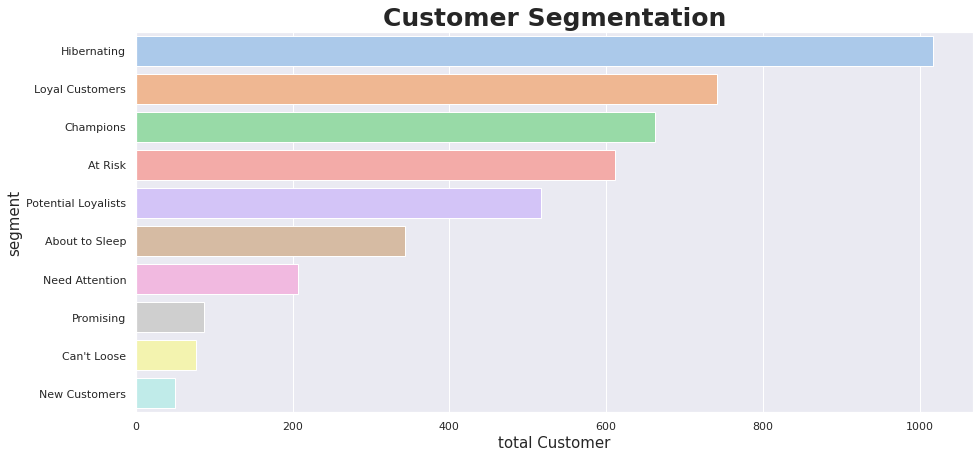

In [53]:
plt.figure(figsize = (15, 7))
sns.barplot(data=df_segment, x='TotalCustomer', y='segment', orient='h', order=df_segment.sort_values('TotalCustomer', ascending = False).segment)
plt.title("Customer Segmentation", fontsize=25, fontweight='bold')
plt.xlabel("total Customer", fontsize = 15)
plt.ylabel("segment", fontsize = 15)

It shows that **"hibernating"** customers reach the top 1. So, we lost many customers due to hibernating customer conditions since the customer's last purchase was very long ago and they did not spend so much.


> **Reccomendation**
1. We focus on the target market to Champions, Loyal Customers, and Potential Loyalists by giving reward points, discount, free delivery for bundling products to encourage repeat order.
2. For customers who purchase over the last 30 days, send surveys to them to gather feedback and understand why they have become dormant.